In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler



In [4]:
df= pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
df.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

<Axes: >

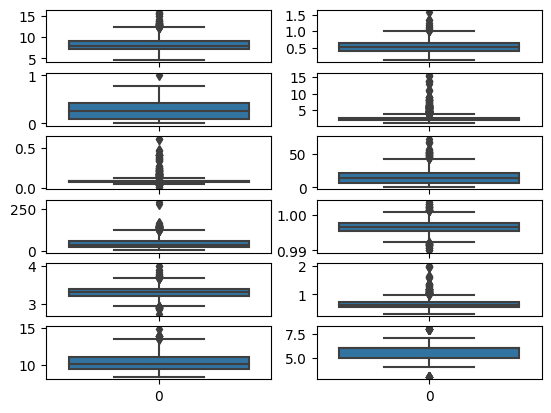

In [8]:
plt.subplot(6,2,1)
sns.boxplot(df['fixed acidity'])
plt.subplot(6,2,2)
sns.boxplot(df['volatile acidity'])
plt.subplot(6,2,3)
sns.boxplot(df['citric acid'])
plt.subplot(6,2,4)
sns.boxplot(df['residual sugar'])
plt.subplot(6,2,5)
sns.boxplot(df['chlorides'])
plt.subplot(6,2,6)
sns.boxplot(df['free sulfur dioxide'])
plt.subplot(6,2,7)
sns.boxplot(df['total sulfur dioxide'])
plt.subplot(6,2,8)
sns.boxplot(df['density'])
plt.subplot(6,2,9)
sns.boxplot(df['pH'])
plt.subplot(6,2,10)
sns.boxplot(df['sulphates'])
plt.subplot(6,2,11)
sns.boxplot(df['alcohol'])
plt.subplot(6,2,12)
sns.boxplot(df['quality'])


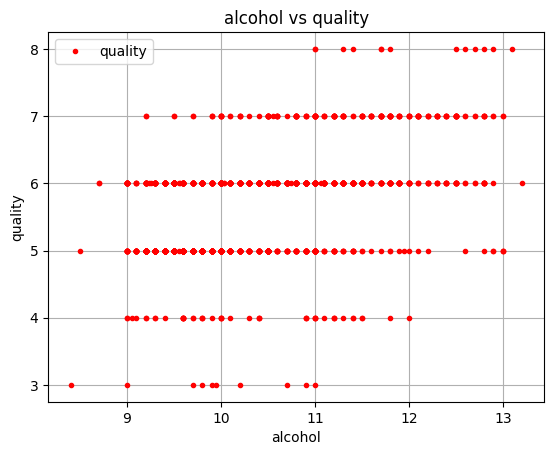

In [81]:
df.plot(x='alcohol',y='quality',style='.',color='r')
plt.title('alcohol vs quality')
plt.xlabel('alcohol')
plt.ylabel('quality')
plt.grid()
plt.show()

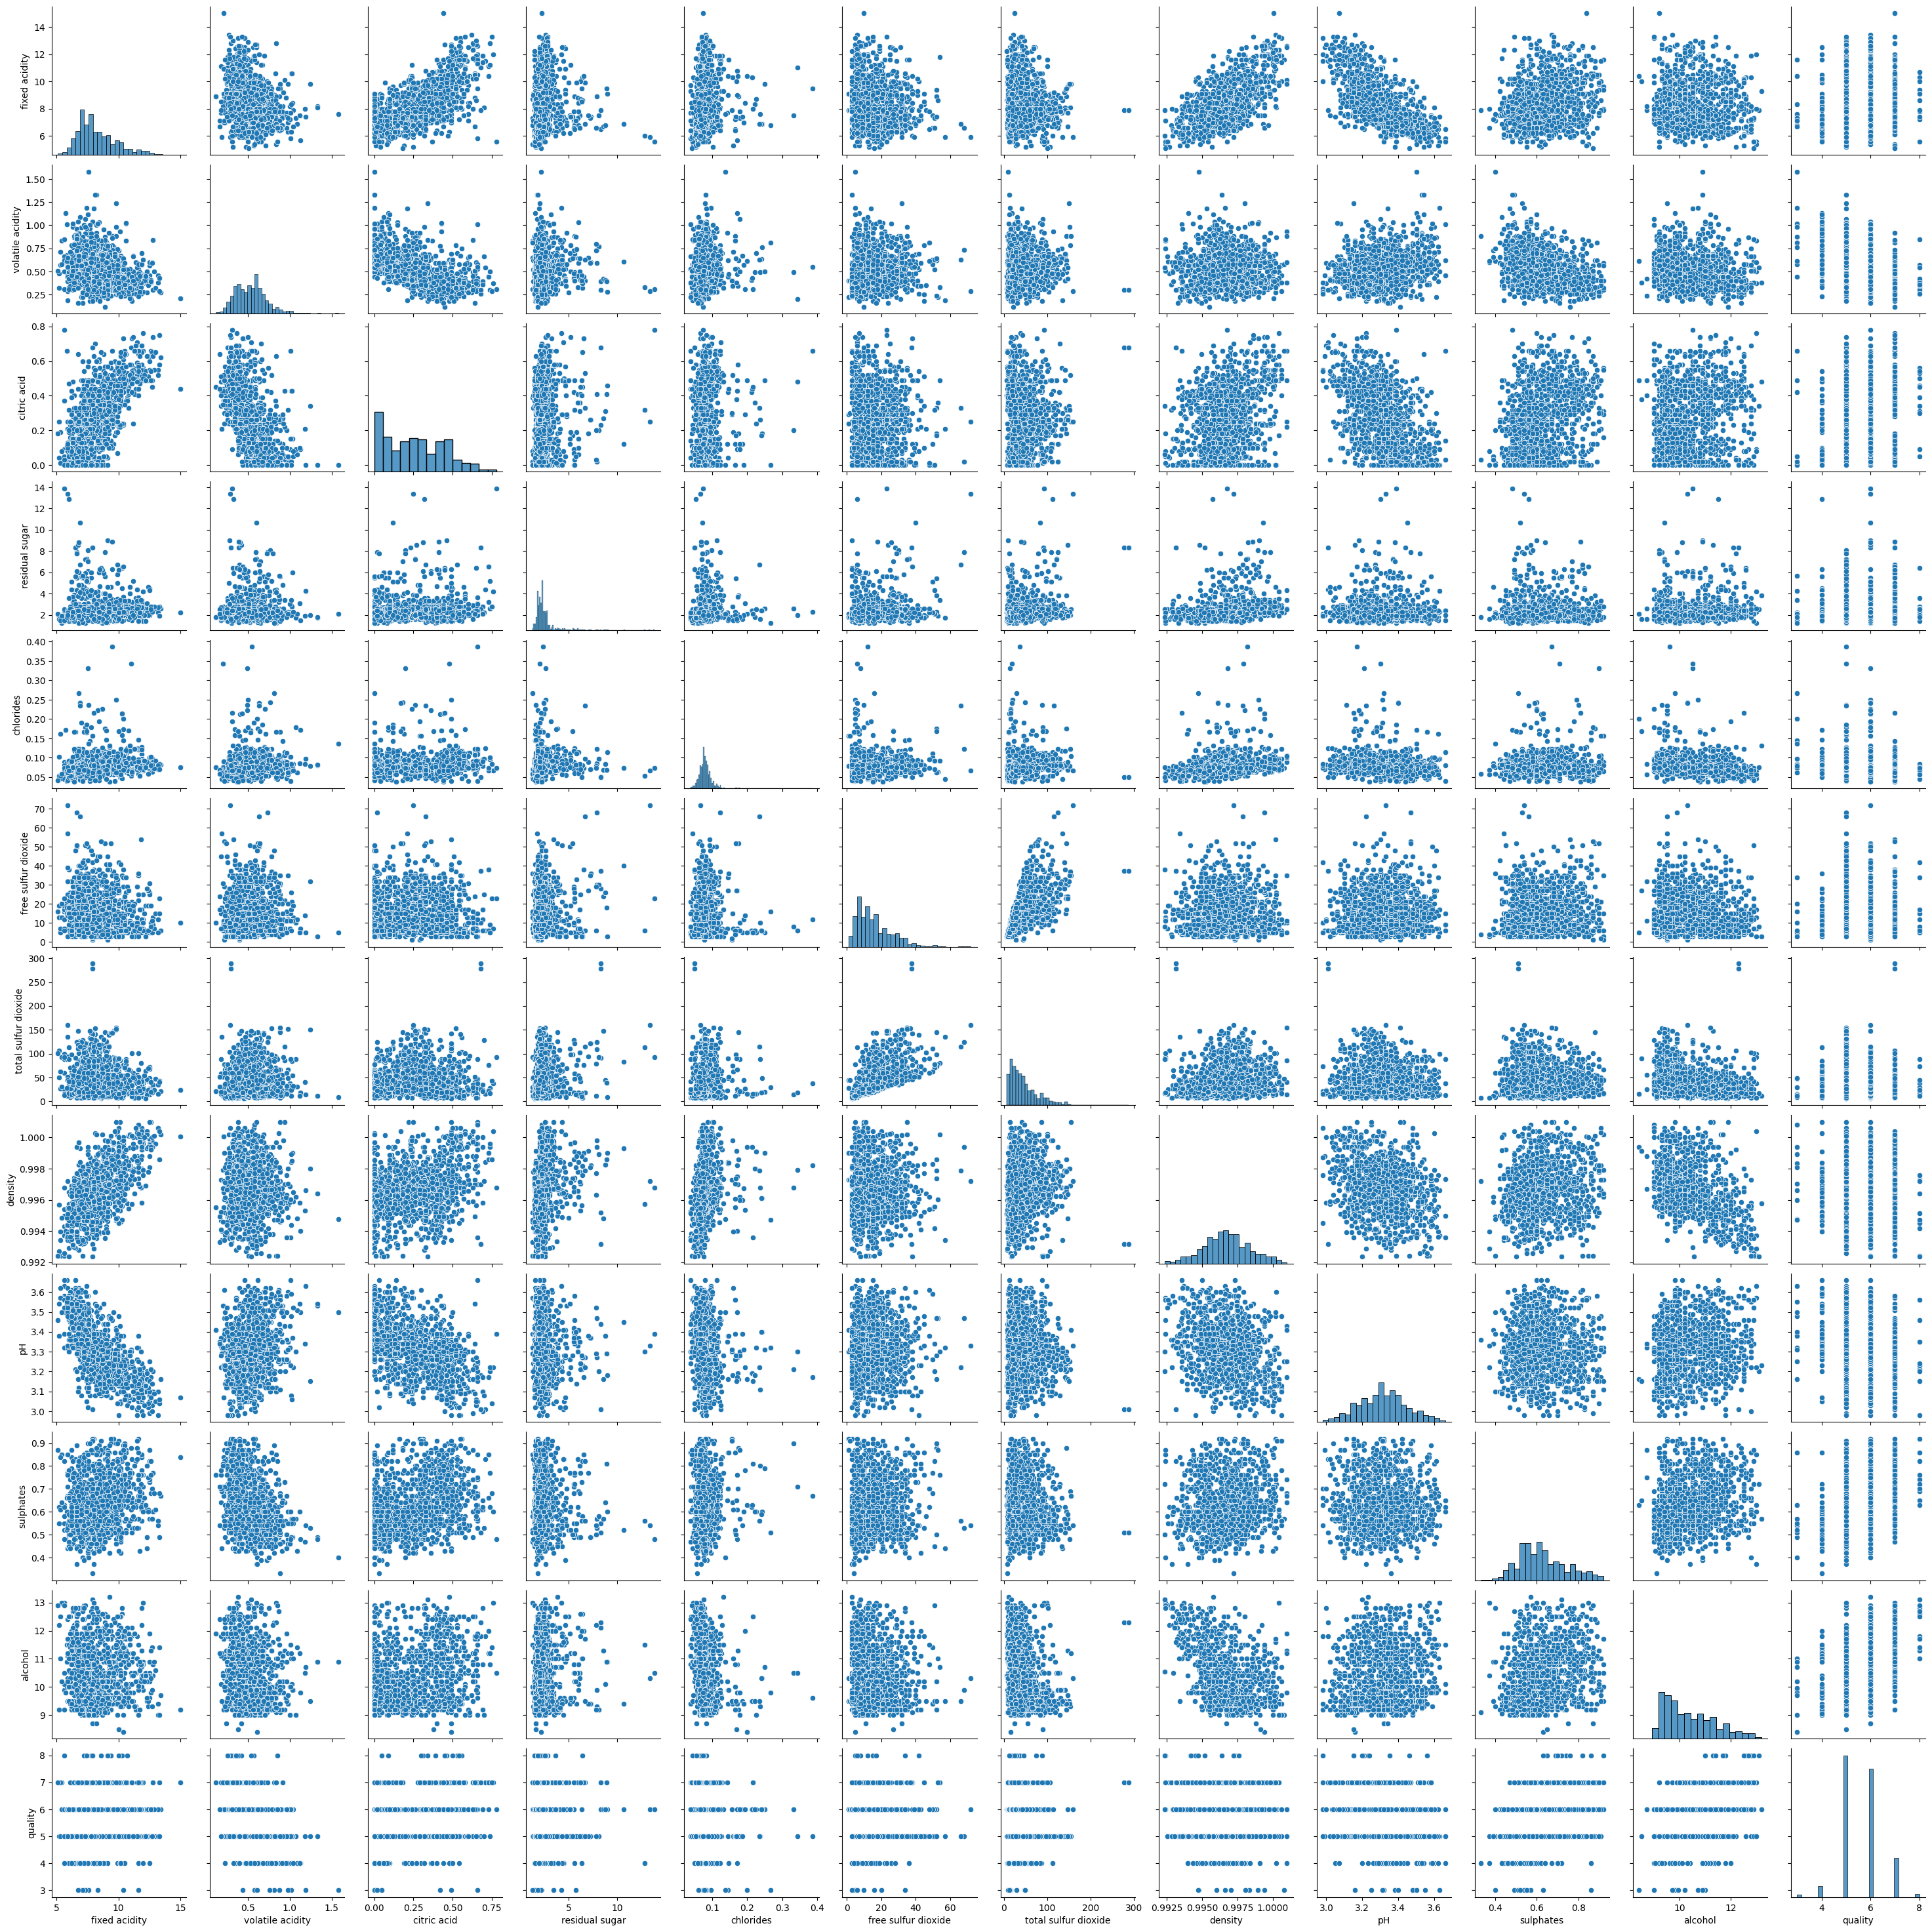

In [83]:
sns.pairplot(df)

<Axes: >

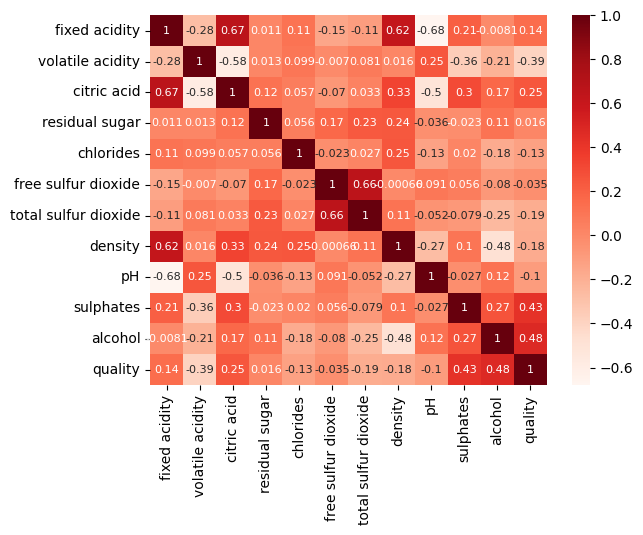

In [87]:
sns.heatmap(df.corr(),annot=True,annot_kws={'size':8},cmap="Reds")


In [9]:
list(df.columns)


['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [43]:
scale = StandardScaler()
X = df[['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']]

""""ScaledX = scale.fit_transform(X)"""
X


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [44]:
Y = df['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)
Y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1442, dtype: int64

In [45]:
df.corrwith(df["quality"])


fixed acidity           0.137734
volatile acidity       -0.390769
citric acid             0.243063
residual sugar          0.016804
chlorides              -0.127056
free sulfur dioxide    -0.037676
total sulfur dioxide   -0.187411
density                -0.181395
pH                     -0.096872
sulphates               0.415477
alcohol                 0.481816
quality                 1.000000
dtype: float64

In [48]:
f1 = df.alcohol.quantile(0.25) #Q1
f3 = df.alcohol.quantile(0.75) #Q3
IQR_f = f3 - f1
upper_limit_f = f3+(1.5)*(IQR_f)
lower_limit_f = f1-(1.5)*(IQR_f)
df=df[(df.alcohol<upper_limit_f) & (df.alcohol>lower_limit_f)]


In [49]:
f1 = df.sulphates.quantile(0.25) #Q1
f3 = df.sulphates.quantile(0.75) #Q3
IQR_f = f3 - f1
upper_limit_f = f3+(1.5)*(IQR_f)
lower_limit_f = f1-(1.5)*(IQR_f)
df=df[(df.sulphates<upper_limit_f) & (df.sulphates>lower_limit_f)]


In [50]:
f1 = df.pH.quantile(0.25) #Q1
f3 = df.pH.quantile(0.75) #Q3
IQR_f = f3 - f1
upper_limit_f = f3+(1.5)*(IQR_f)
lower_limit_f = f1-(1.5)*(IQR_f)
df=df[(df.pH<upper_limit_f) & (df.pH>lower_limit_f)]


In [51]:
f1 = df.density.quantile(0.25) #Q1
f3 = df.density.quantile(0.75) #Q3
IQR_f = f3 - f1
upper_limit_f = f3+(1.5)*(IQR_f)
lower_limit_f = f1-(1.5)*(IQR_f)
df=df[(df.density<upper_limit_f) & (df.density>lower_limit_f)]


In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [53]:
random=RandomForestClassifier()
fit=random.fit(X_train,Y_train)

score=random.score(X_test,Y_test)
print('The score of the model is : ',score)
predict=random.predict(X_test)
print(classification_report(predict,Y_test))

The score of the model is :  0.9100346020761245
              precision    recall  f1-score   support

           0       0.98      0.93      0.95       272
           1       0.35      0.65      0.46        17

    accuracy                           0.91       289
   macro avg       0.67      0.79      0.70       289
weighted avg       0.94      0.91      0.92       289



In [54]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
143,6.3,0.39,0.08,1.7,0.066,3.0,20.0,0.99540,3.34,0.58,9.4
408,10.4,0.34,0.58,3.7,0.174,6.0,16.0,0.99700,3.19,0.70,11.3
829,5.9,0.61,0.08,2.1,0.071,16.0,24.0,0.99376,3.56,0.77,11.1
960,8.5,0.47,0.27,1.9,0.058,18.0,38.0,0.99518,3.16,0.85,11.1
433,12.3,0.39,0.63,2.3,0.091,6.0,18.0,1.00040,3.16,0.49,9.5
...,...,...,...,...,...,...,...,...,...,...,...
897,7.1,0.59,0.01,2.3,0.080,27.0,43.0,0.99550,3.42,0.58,10.7
292,10.4,0.55,0.23,2.7,0.091,18.0,48.0,0.99940,3.22,0.64,10.3
1085,6.8,0.48,0.08,1.8,0.074,40.0,64.0,0.99529,3.12,0.49,9.6
1069,8.0,0.62,0.35,2.8,0.086,28.0,52.0,0.99700,3.31,0.62,10.8


In [78]:
random_test = (6.3,0.0059,0.55,3.0,0.001,0.02,2,0.7995,4.251,0.7,12)


In [79]:
modded_random = np.asarray(random_test)

input_data_reshaped = modded_random.reshape(1,-1)

prediction = random.predict(input_data_reshaped)
if(prediction==0):
  print("BAD WINE")
else:
  print("GOOD WINE")

GOOD WINE


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
